In [111]:
#
# Instructions: To run all code, click Cell --> Run All
#


#Import necissary modules
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils


from keras.utils.vis_utils import model_to_dot


import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
from IPython.display import HTML, display
import matplotlib.gridspec as gridspec

In [112]:

display(HTML('''<a id='top'></a>
 
<p>
<h1>Colorectal Cancer Machine Learning Model</h1>
<h3>Select one of the options below to visualize your data set. Some queries may take up to 5 minutes to run.<h3>
<p>
&nbsp;
<a href='#CNN'>Create our CNN Model</a> &nbsp;|&nbsp;  
<a href='#train_model'>Train the Model</a> &nbsp;|&nbsp;
<a href='#acc-loss'>Accuracy and Loss Graph</a> &nbsp;|&nbsp;
<a href='#test-random-images'>Test the Model</a> &nbsp;|
'''))



In [113]:
#Assign a label to images in each directory.
def get_images(path):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(path):
        if labels == '01_TUMOR':
            label = 1
        elif labels == '02_STROMA':
            label = 2
        elif labels == '03_COMPLEX':
            label = 3
        elif labels == '04_LYMPHO':
            label = 4
        elif labels == '05_DEBRIS':
            label = 5
        elif labels == '06_MUCOSA':
            label = 6
        elif labels == '07_ADIPOSE':
            label = 7
        elif labels == '08_EMPTY':
            label = 8
            
        for image_file in os.listdir(path+labels):
            image = cv2.imread(path+labels+r'/'+ image_file)
            Images.append(image)
            Labels.append(label)
    return shuffle(Images, Labels)

#Function to query class label
def get_classLabel(class_code):
    labels = {1: 'Tumor', 2: 'Stroma', 3: 'Complex', 4: 'Lympho', 5: 'Debris', 6: 'Mucosa', 7: 'Adipose', 8: 'Empty'}
    return labels[class_code]

In [114]:
HTML('''<a id='CNN'></a>''')

In [115]:
#Creating our CNN Model.
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(9,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 21, 21, 50)       

In [116]:
HTML('''<a id='train_model'></a>''')

In [117]:
Images, Labels = get_images('../Data_Set_Sample/')

Images = np.array(Images)
Labels = np.array(Labels)
#Specify the parameters for our model to be trained, we will use a 70%, 30% split for Training and Test data. 
#The model will run through 40 Epochs.
#This action will train the model on a small sample of the data set. It will take ~30 minutes to run on a typical PC.
#Un-comment the line below to run the full training simulation

#trained = model.fit(Images, Labels, epochs=40, validation_split=0.30)

In [118]:
HTML('''<a id='acc-loss'></a>''')

In [119]:
# Must run full model to view accuracy and loss.
# Uncoment the lines below to view the accuracy/loss graphs.

#Plots model accuracy
#plot.plot(trained.history['accuracy'])
#plot.plot(trained.history['val_accuracy'])
#plot.title('Model accuracy')
#plot.ylabel('Accuracy')
#plot.xlabel('Epoch')
#plot.legend(['Train', 'Test'], loc='upper left')
#plot.show()

#Plots model loss
#plot.plot(trained.history['loss'])
#plot.plot(trained.history['val_loss'])
#plot.title('Model loss')
#plot.ylabel('Loss')
#plot.xlabel('Epoch')
#plot.legend(['Train', 'Test'], loc='upper left')
#plot.show()

In [120]:
HTML('''<a id='test-random-images'></a>''')

In [121]:
#loading our model for review
Saved_model = load_model('../Colorectal_Model_5_6_2020.h5')

#load test images for review by pathologist
pred_images,no_labels = get_images('../Images/Test_Images/')
pred_images = np.array(pred_images)


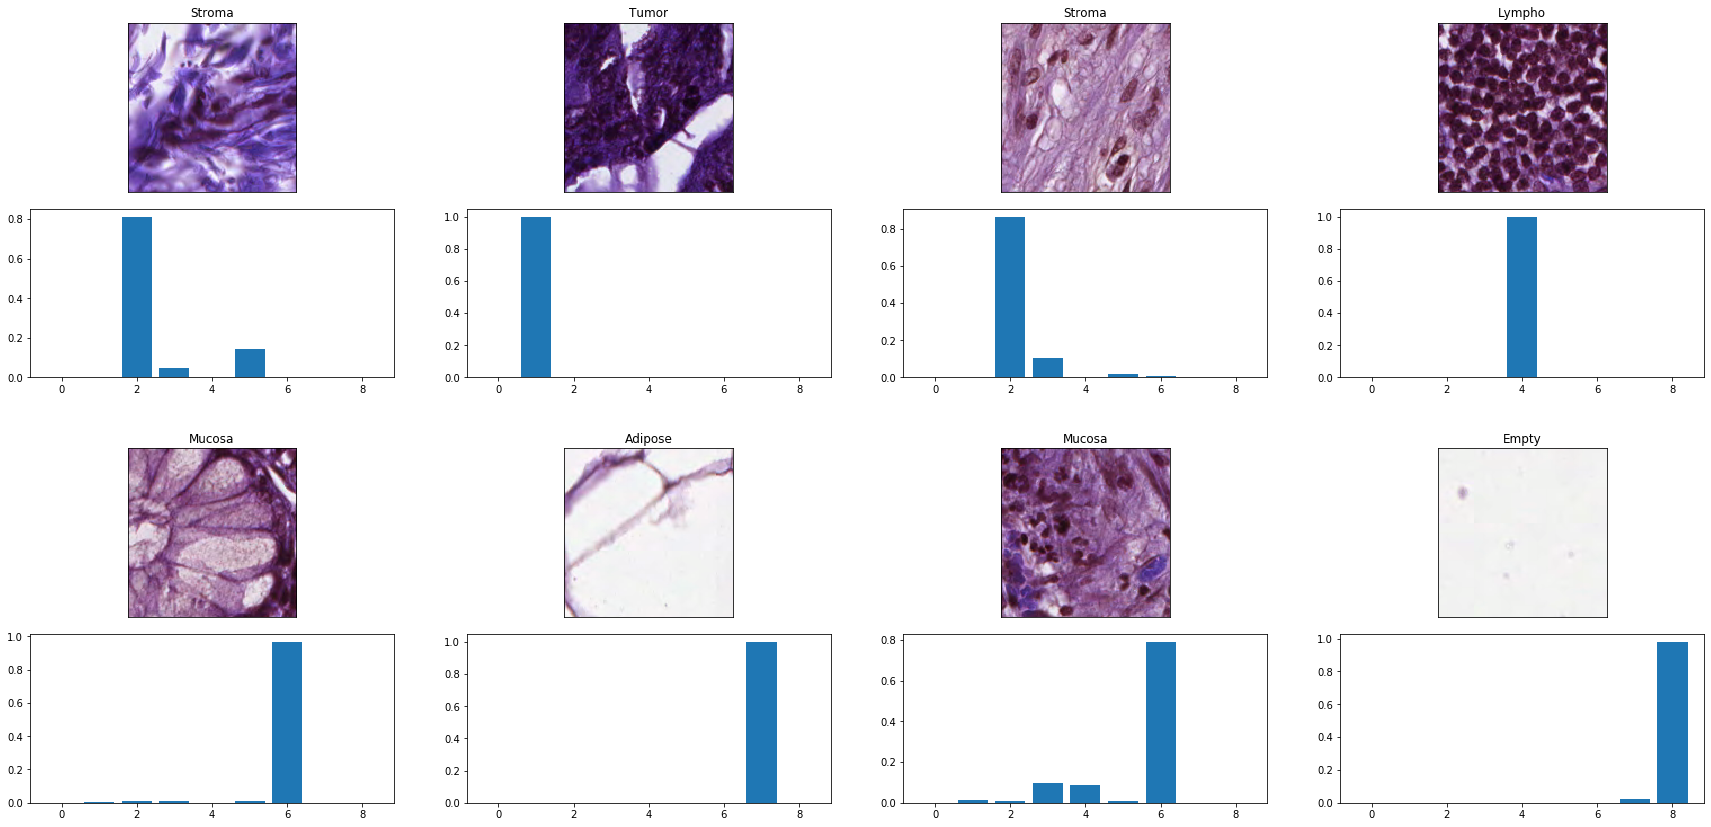

In [122]:
#Script to test a given model

fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)

for i in range(8):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    pred_image = np.array([pred_images[i]])
    pred_class = get_classLabel(Saved_model.predict_classes(pred_image)[0])
    pred_prob = Saved_model.predict(pred_image).reshape(9)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6,7,8],pred_prob)
            fig.add_subplot(ax)

            